In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [29]:
df = pd.read_csv("insurance.csv")

No hay valores faltantes

In [30]:
df.isna().sum()

age         0
sex         0
bmi         0
children    0
smoker      0
region      0
charges     0
dtype: int64

In [31]:
df.describe()

,age,bmi,children,charges
count,1338.000000,1338.000000,1338.000000,1338.000000
mean,39.207025,30.663397,1.094918,13270.422265
std,14.049960,6.098187,1.205493,12110.011237
min,18.000000,15.960000,0.000000,1121.873900
25%,27.000000,26.296250,0.000000,4740.287150
50%,39.000000,30.400000,1.000000,9382.033000
75%,51.000000,34.693750,2.000000,16639.912515
max,64.000000,53.130000,5.000000,63770.428010


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 7 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   age       1338 non-null   int64  
 1   sex       1338 non-null   object 
 2   bmi       1338 non-null   float64
 3   children  1338 non-null   int64  
 4   smoker    1338 non-null   object 
 5   region    1338 non-null   object 
 6   charges   1338 non-null   float64
dtypes: float64(2), int64(2), object(3)
memory usage: 73.3+ KB


<AxesSubplot:>

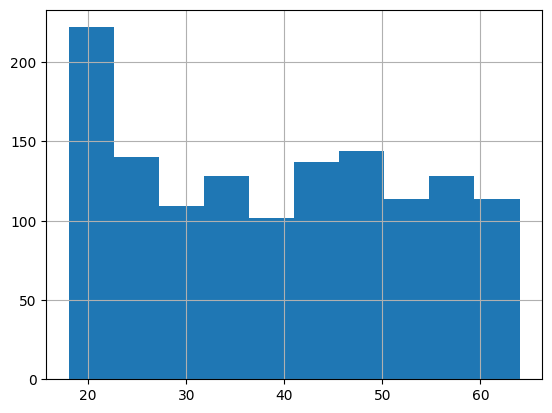

In [33]:
df.age.hist()

<AxesSubplot:>

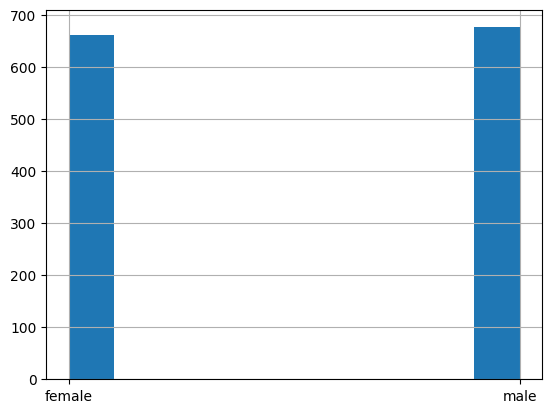

In [34]:
df.sex.hist()

<AxesSubplot:>

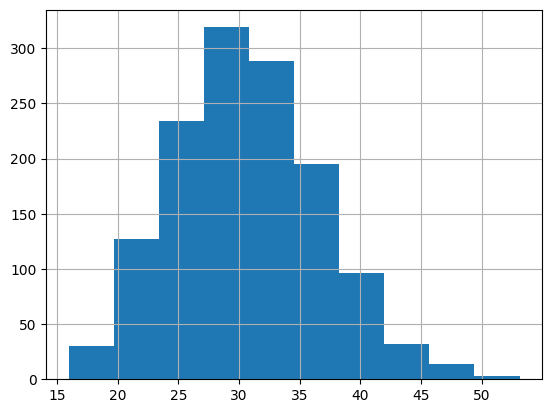

In [35]:
df.bmi.hist()

<AxesSubplot:>

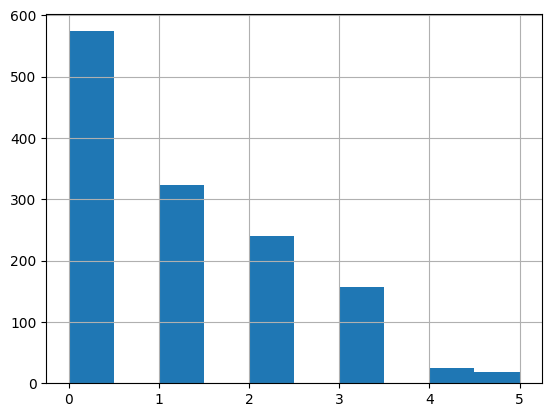

In [36]:
df.children.hist()

<AxesSubplot:>

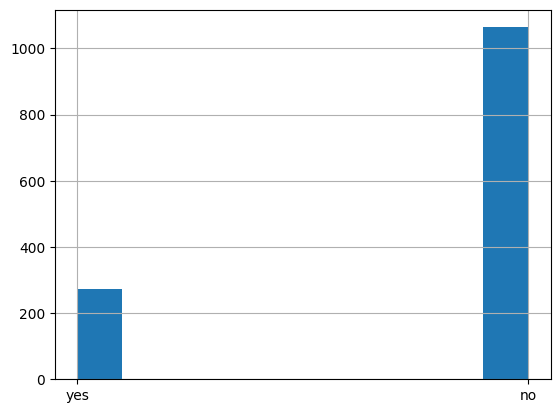

In [37]:
df.smoker.hist()

<AxesSubplot:>

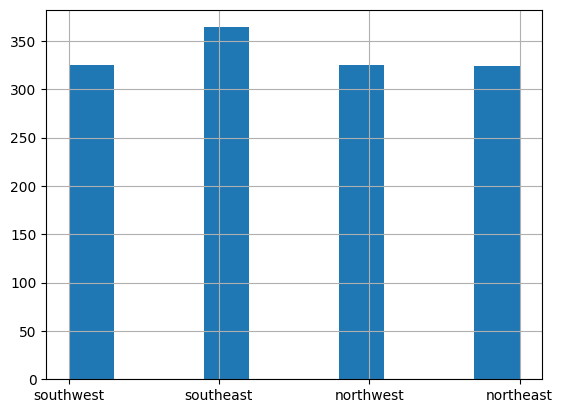

In [38]:
df.region.hist()

<AxesSubplot:>

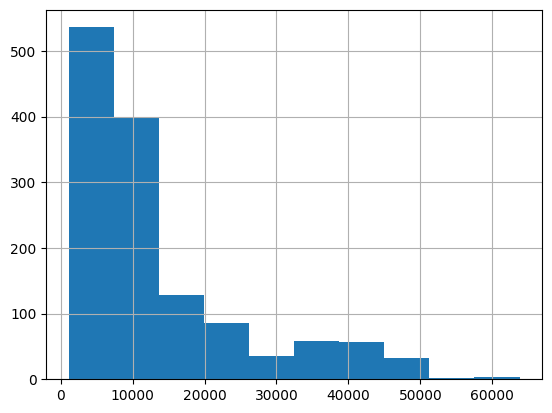

In [39]:
df.charges.hist()

Realizamos cambios para que variables categoricas queden numericas
Utilizamos drop_first=True porque sabemos que en la regresión lineal cuando se utilizan dummies una de ellas debe ir al intercepto


In [6]:
df = pd.get_dummies(df,drop_first=True)

## Entrene un primer modelo de regresión lineal sin aplicar ningún tipo de regularización. Evalúe dicho modelo y
concluya:
i. ¿Es aceptable el error obtenido?
ii. ¿Hay evidencia de overfitting?

Dividimos entre train y test

In [7]:
X = df.drop("charges",axis = 1)
y = df["charges"]

In [8]:
y.describe()

count     1338.000000
mean     13270.422265
std      12110.011237
min       1121.873900
25%       4740.287150
50%       9382.033000
75%      16639.912515
max      63770.428010
Name: charges, dtype: float64

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [10]:
from sklearn.linear_model import LinearRegression

lin_reg = LinearRegression()
lin_reg.fit(X_train,y_train)

LinearRegression()

In [11]:
from sklearn.metrics import mean_squared_error

y_pred = lin_reg.predict(X_train)
rmse_train = mean_squared_error(y_train, y_pred,squared=False)


In [12]:

y_pred = lin_reg.predict(X_test)
rmse_test_lr = mean_squared_error(y_test, y_pred,squared=False)


In [13]:
rmse_train

6104.832329136059

In [14]:
rmse_test_lr

5923.700340633856

Si el error es aceptable o no depende mucho del negocio. Sin embargo, en datos nuevos el modelo se va a equivocar en promedio por $5923.700340633856

No hay evidencia de overfitting ya que el modelo se comporta consistentemente en train y en test.

## Aplique una transformación polinomial a los datos de entrada y regularización Ridge o Lasso al modelo de regresión. Pruebe con al menos 2 grados diferentes del polinomio y con al menos 3 valores de alpha para la regularización. Evalúe dichos modelos y concluya:

In [15]:
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import Ridge


In [16]:
resp = []
alphas = [0.001,0.01,0.1]
poly = [2,4]

In [17]:
for grado in poly:
    poly_features = PolynomialFeatures(degree = grado, include_bias = False)
    numeric_poly = poly_features.fit_transform(X)
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(numeric_poly)
    X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
    for alpha in alphas:
        ridge = Ridge(alpha = alpha, solver = "cholesky")
        ridge.fit(X_train,y_train)
        y_pred = ridge.predict(X_test)
        resp.append({"alpha":alpha,"grado":grado,"rmse_test":mean_squared_error(y_test, y_pred,squared=False)})

In [18]:
resp

[{'alpha': 0.001, 'grado': 2, 'rmse_test': 4654.978373605796},
 {'alpha': 0.01, 'grado': 2, 'rmse_test': 4654.980551415385},
 {'alpha': 0.1, 'grado': 2, 'rmse_test': 4655.028862182522},
 {'alpha': 0.001, 'grado': 4, 'rmse_test': 6426.303961207836},
 {'alpha': 0.01, 'grado': 4, 'rmse_test': 5971.051531732132},
 {'alpha': 0.1, 'grado': 4, 'rmse_test': 5523.128028967179}]

## Sí fue posible mejorar el error
Observamos que el grado polinomial 2 da muchos mejores resultados

In [19]:
ridge_results = pd.DataFrame(resp)
ridge_results.sort_values("rmse_test")

,alpha,grado,rmse_test
0,0.001,2,4654.978374
1,0.010,2,4654.980551
2,0.100,2,4655.028862
5,0.100,4,5523.128029
4,0.010,4,5971.051532
3,0.001,4,6426.303961


In [20]:
resp = []
poly_features = PolynomialFeatures(degree = 2, include_bias = False)
numeric_poly = poly_features.fit_transform(X)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(numeric_poly)
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.33, random_state=42)
ridge = Ridge(alpha = 0.001, solver = "cholesky")
ridge.fit(X_train,y_train)
y_pred = ridge.predict(X_test)
resp.append({"alpha":alpha,"grado":grado,"mse_test":mean_squared_error(y_test, y_pred)})

In [21]:
coeficientes = pd.DataFrame(ridge.coef_,columns = ["coeff"])
coeficientes["name"] = poly_features.get_feature_names(X.columns)
coeficientes.coeff = coeficientes.coeff.apply(abs)

/Users/juangarcia/opt/anaconda3/envs/DataScienceBasics/lib/python3.10/site-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [22]:
coeficientes.sort_values("coeff",ascending = False)

,coeff,name
19,18744.440237,bmi smoker_yes
8,4336.155938,age^2
34,4203.048669,smoker_yes^2
4,4203.048665,smoker_yes
1,2442.560132,bmi
16,2397.781553,bmi^2
21,1790.130698,bmi region_southeast
22,1676.695887,bmi region_southwest
0,1581.376678,age
15,1033.127336,age region_southwest


### Conclusiones

<ul>
    <li>El error del primer modelo no se sabe si es aceptable ya que se debe hablar con el experto para validar el desempeño</li>
    <li> En la regresión lineal no hay evidencia de overfitting ya que el desempeño es consistente en train y en test</li>
    <li> El modelo polinomial ridge con grado 2 y alpha 0.001 es el que tiene el mejor desempeño </li>
    <li> Los atributos que parecen más importantes es la interacción de bmi con si es fumador, la edad al cuadrado y si es fumador</li>
</ul>